In [75]:
# download modsim.py if necessary

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

In [76]:
# import functions from modsim

from modsim import *

In [77]:
import numpy as np
from modsim import State, System, TimeSeries, linrange,  root_scalar, decorate

In [78]:
# Define the change function based on Newton's law of cooling
def change_func(t, T, system):
    r, T_env, dt = system.r, system.T_env, system.dt
    return -r * (T - T_env) * dt

In [79]:
def make_system(T_init, volume, r, t_end):
    return System(T_init=T_init,
                  T_final=T_init,
                  volume=volume,
                  r=r,
                  t_end=t_end,
                  T_env=22,
                  t_0=0,
                  dt=1)

In [80]:
def run_simulation(system, change_func):
    t_array = linrange(system.t_0, system.t_end, system.dt)
    n = len(t_array)

    series = TimeSeries(index=t_array)
    series.iloc[0] = system.T_init

    for i in range(n-1):
        t = t_array[i]
        T = series.iloc[i]
        series.iloc[i+1] = T + change_func(t, T, system)

    system.T_final = series.iloc[-1]
    return series

In [81]:
def error_func(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 70

In [82]:
def error_func_milk(r, system):
    system.r = r
    results = run_simulation(system, change_func)
    return system.T_final - 20

In [83]:
coffee = make_system(T_init=90, volume=300, r=0.01, t_end=30)


In [84]:
results_coffee = run_simulation(coffee, change_func)


In [85]:
res_coffee = root_scalar(error_func, coffee, bracket=[0.01, 0.02])
r_coffee = res_coffee.root

In [86]:
coffee.r = r_coffee
results_coffee = run_simulation(coffee, change_func)


In [87]:
milk = make_system(T_init=5, volume=50, r=0.1, t_end=15)


In [88]:
results_milk = run_simulation(milk, change_func)


In [89]:
res_milk = root_scalar(error_func_milk, milk, bracket=[0.1, 0.2])
r_milk = res_milk.root

In [90]:
milk.r = r_milk
results_milk = run_simulation(milk, change_func)

In [91]:
soup = make_system(T_init=85, volume=500, r=0.02, t_end=20)


In [92]:
results_soup = run_simulation(soup, change_func)


In [93]:
res_milk = root_scalar(error_func_milk, milk, bracket=[0.1, 0.2])
r_milk = res_milk.root

In [94]:
milk.r = r_milk
results_milk = run_simulation(milk, change_func)

In [95]:
soup = make_system(T_init=85, volume=500, r=0.02, t_end=20)

In [96]:
results_soup = run_simulation(soup, change_func)


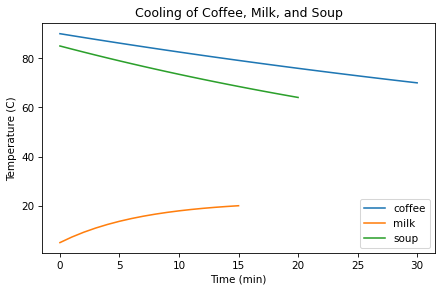

In [97]:
results_coffee.plot(label='coffee')
results_milk.plot(color='C1', label='milk')
results_soup.plot(color='C2', label='soup')

# Decorate the plot
decorate(xlabel='Time (min)',
         ylabel='Temperature (C)',
         title='Cooling of Coffee, Milk, and Soup')
